<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Exercise_Upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Importing the dataset

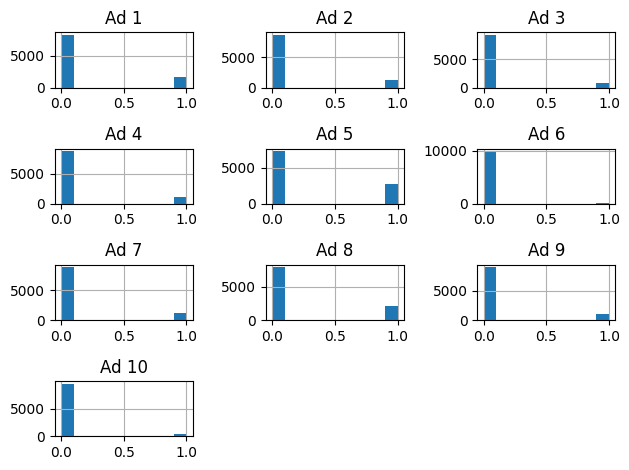

In [18]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.hist()
plt.tight_layout()

## Implementing UCB

In [27]:
import math
N = 5000 # Number Of users
d = 10  # Number of ads(ad1,ad2,ad3,_______,adn)
ads_selected = []
numbers_of_selections = [0] * d   # Number of times a ad was selected
sums_of_rewards = [0] * d       # Sum of rewards for reinforcement learning
total_reward = 0                  # Total reward
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

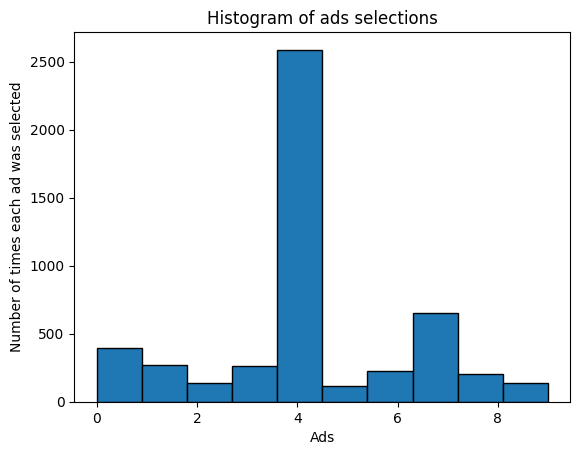

In [28]:
plt.hist(ads_selected,edgecolor='black')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()